#### HW8

In [63]:
using LinearAlgebra, PyPlot

#### Problem 1

In [74]:
function cubic_spline(x,y)
    h = (x[2:length(x)] .- x[1:(length(x)-1)])
    dl = copy(h)
    dl[end] = 0.0
    d = zeros(length(x))
    d[1] = d[end] = 1
    d[2:(end-1)] = 2*(h[1:end-1] .+ h[2:end])
    du = zeros(length(x)-1)
    du[2:end] = h[2:end]
    A = Tridiagonal(convert.(Float64,dl),convert.(Float64,d),convert.(Float64,du))
    f = zeros(length(y))
    new_y = y[2:end] .- y[1:(end-1)]
    f[2:(end-1)] = (3*(new_y[2:end]) ./ h[1:(end-1)]) .- (3*(new_y[1:(end-1)]) ./ h[2:end])
    c = A\f
    b = @. new_y/h - h*(2*c[1:(end-1)]+c[2:end])/3
    d = @. (c[2:end] - c[1:(end-1)])/(3*h)
    return b,c,d
end
x = collect(rand(6))
y = collect(rand(6))
b,c,d = cubic_spline(x,y)

([-0.41174450931703754, 6.237515077894982, -0.99313893276894, 1.3916574539794508, -0.31733203575595226], [0.0, 18.040680728915834, 2.67796118077775, 3.6376789503728078, 0.4455833912565108, 0.0], [14.301857271064387, 18.201130840983435, 0.5396257764092167, 2.536612673333631, 0.3447832899783695])

#### Problem 1(b)

In [78]:
function spline_eval(x,y,b,c,d,xx)
    yy = zeros(length(xx))
    for i in 1:length(yy)
        for j in 1:(length(x)-1)
            if (xx[i]<=x[j+1])&(xx[i]>=x[j])
                yy[i] = y[j] + b[j]*(xx[i]-x[j])+c[j]*(xx[i]-x[j])^2 + d[j]*(xx[i]-x[j])^3
                break
            end
        end
    end
    return yy
end


spline_eval (generic function with 1 method)

#### Problem 1(c)

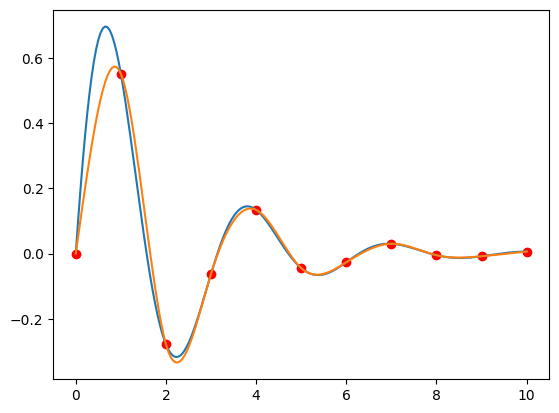

PyObject <matplotlib.collections.PathCollection object at 0x7fa9fe38a230>

In [89]:
f(x) = exp(-x/2)*sin(2*x)
xx = collect(range(0, stop=10, length=200))
plot(xx, f.(xx))
x = collect(0:1:10)
y = collect(f.(x))
b,c,d = cubic_spline(x,y)
yy = spline_eval(x,y,b,c,d,xx)
plot(xx,yy)
scatter(x,y,color = "red")

#### Problem 2(a)

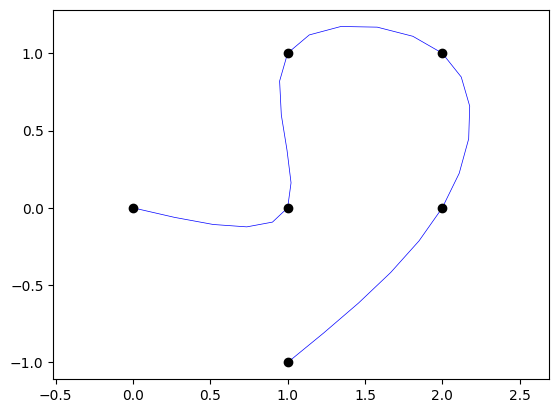

In [112]:
function plot_parametric_spline(x,y; r = 10)
    t =  collect(1:1:length(x))
    tt = (collect(range(0, stop=length(x), length=3*r+1)))
    #we will do the interpolation on both x and y
    b1,c1,d1 = cubic_spline(t,x)
    b2,c2,d2 = cubic_spline(t,y)
    xx = spline_eval(t,x,b1,c1,d1,tt)
    yy = spline_eval(t,y,b2,c2,d2,tt)
    plot(xx,yy,linewidth = 0.5,color = "blue")
    axis("equal")
end
xy = [0 0; 1 0; 1 1; 2 1; 2 0; 1 -1]
plot_parametric_spline(xy[:,1], xy[:,2])
plot(xy[:,1], xy[:,2], "ko");